# Students Performance in Exams - Excercise Version


### Context
This data set includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them.


### Inspiration behind this project:
To understand the influence of the parents background, test preparation etc on students performance.

### Summary
The main aim of this notebook is to analyse how are the scores impacted based on different variables which include gender, race, lunch, test preparation course etc...

Each column is picked and analysed how they affect the scores. 

For easy understanding we'll be using graphs and plots because visualisation is the best way to understand.

In [1]:
# hiding unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
# importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [11]:
# importing dataset into jupyter notebook
student_df = pd.read_csv('StudentsPerformance.csv')

In [210]:
# viewing the first 5 rows of the student performance dataset
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [81]:
# getting information about the dataset
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   total score                  1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [39]:
# getting the shape of the dataframe
student_df.shape

(1000, 9)

The dataser contains 1000 entries with 9 columns.

In [40]:
# understanding basic information of the data like min, max, mean and standard deviation etc.
student_df.describe()

,math score,reading score,writing score,total score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [42]:
# checking for missing values
student_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total score                    0
dtype: int64

In [121]:
# Printing the average scores
print(f"Average math score is    : {student_df['math score'].mean()}")
print(f"Average reading score is : {student_df['reading score'].mean()}")
print(f"Average writing score is : {student_df['writing score'].mean()}")
print(f"Average total score is   : {round((student_df['total score'].mean())/3, 3)}")

Average math score is    : 66.089
Average reading score is : 69.169
Average writing score is : 68.054
Average total score is   : 67.771


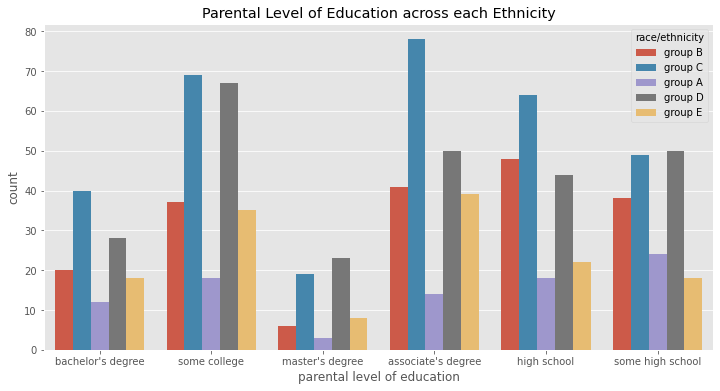

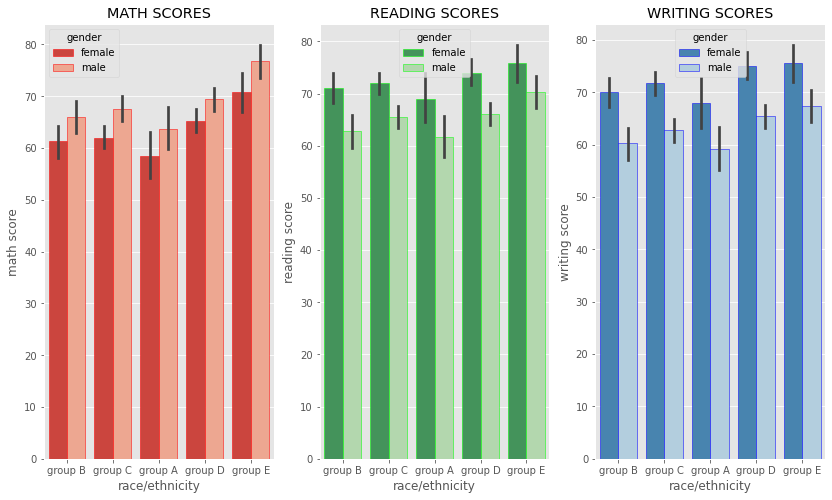

In [23]:
# Checking indepthly how people score from different ethnicity.
plt.figure(figsize=(14,8))

plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x = 'race/ethnicity', y = 'math score',
            data = student_df, hue = 'gender',palette = 'Reds_r',edgecolor = '#ff0000')

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',
            data=student_df, hue='gender',palette='Greens_r',edgecolor='#00ff00')

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',
            data=student_df, hue='gender',palette='Blues_r',edgecolor='#0000ff')
plt.show()

It is observed that male students are better at maths across all ethnicity/race while the female students are better readers and writers across all ethnicity/race.

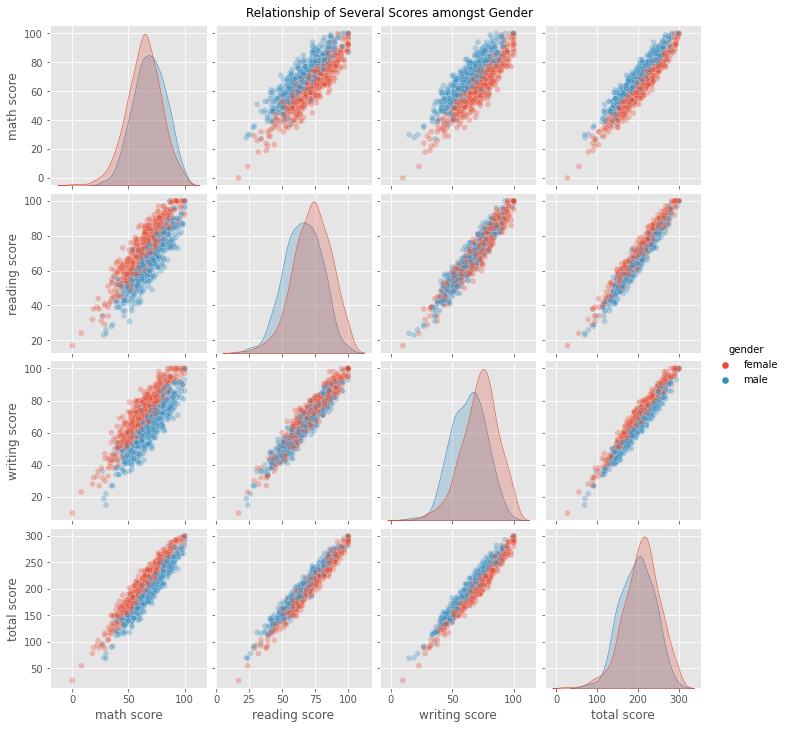

In [70]:
# visualizing the overall relationship of male and female across several features
sns.pairplot(data=student_df,
             hue='gender',
             plot_kws={'alpha':0.3}
            ).fig.suptitle('Relationship of Several Scores amongst Gender', 
                           y=1.01)
plt.show()

From the above plot it is clear that all the scores increase linearly with each other thus showing a strong positive correlation.

In [82]:
# checking the correlation of the various scores
student_df.corr()

,math score,reading score,writing score,total score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total score,0.918746,0.970331,0.965667,1.000000


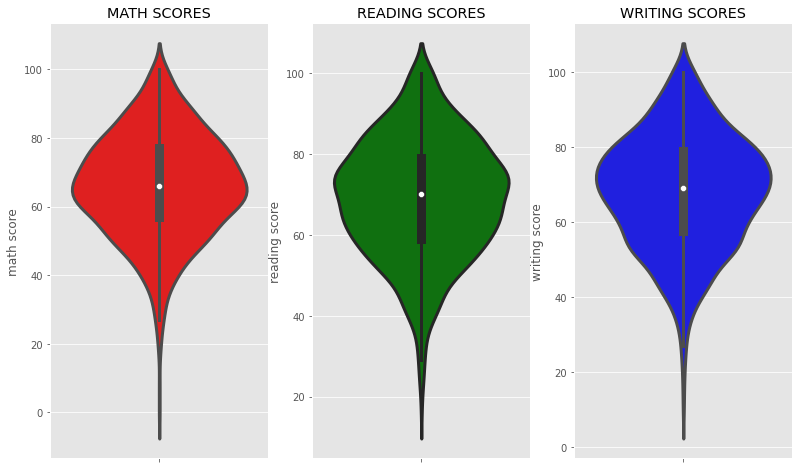

In [80]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=student_df,color='red',linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=student_df,color='green',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=student_df,color='blue',linewidth=3)

plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

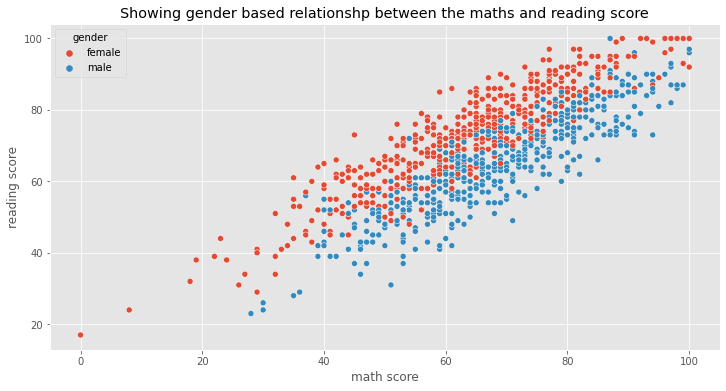

In [338]:
# Showing gender based relationshp between the maths and reading score
plt.figure(figsize=(12, 6))
plt.title('Showing gender based relationshp between the maths and reading score')
sns.scatterplot(x='math score', y='reading score', hue ='gender', data=student_df);

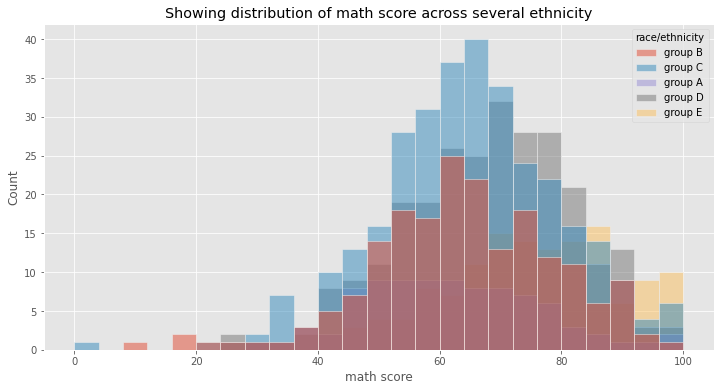

In [346]:
# distribution of math score
plt.figure(figsize=(12, 6))
plt.title('Showing distribution of math score across several ethnicity')
sns.histplot(x='math score', hue='race/ethnicity' ,data=student_df);

It is observed from the graph above that

- Group C has the highes numbe rof students that scored between 50 and 75

- Group E ethnicity has the highest number of students that score high in mathematics

### QUESTION 1: Calculate the total score for each of the students

In [13]:
# creating a new column that aggreagtes the total score
student_df['total score'] = (
    student_df['math score'] + student_df['reading score'] + student_df['writing score']
                            )

In [217]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


### Question 2: How many ethnicity do the students belong to?

In [18]:
race = student_df['race/ethnicity'].nunique()
print(f'There are {race} ethnicity present in the dataset.')

There are 5 ethnicity present in the dataset.


### Question 3: How many students belongs to each of the ethnic groups?

In [14]:
student_df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

### Question 4: Sort the students by their ethnicity and get the number of students that completed their test preparation course

In [23]:
student_df.groupby('race/ethnicity')['test preparation course'].value_counts()

race/ethnicity  test preparation course
group A         none                        58
                completed                   31
group B         none                       122
                completed                   68
group C         none                       202
                completed                  117
group D         none                       180
                completed                   82
group E         none                        80
                completed                   60
Name: test preparation course, dtype: int64

### Question 5: What's the average score for each of the ethnic groups?

In [163]:
display(student_df.groupby('race/ethnicity').mean())
student_df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score,total score
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,188.977528
group B,63.452632,67.352632,65.600000,196.405263
group C,64.463950,69.103448,67.827586,201.394984
group D,67.362595,70.030534,70.145038,207.538168
group E,73.821429,73.028571,71.407143,218.257143


,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


### Question 5b: Which ethnicity have the highest number of student with high scores?

Students in group E have the highest number of scores across all subject therefore it can be estimated that students from group E ethnicity/race are generally bright students.

### Question 6: What are the various parental levels of education

In [25]:
student_df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

### Question 7: Get the parental level of education across the several ethnicity

In [33]:
student_df.groupby('race/ethnicity')['parental level of education'].value_counts()

race/ethnicity  parental level of education
group A         some high school               24
                high school                    18
                some college                   18
                associate's degree             14
                bachelor's degree              12
                master's degree                 3
group B         high school                    48
                associate's degree             41
                some high school               38
                some college                   37
                bachelor's degree              20
                master's degree                 6
group C         associate's degree             78
                some college                   69
                high school                    64
                some high school               49
                bachelor's degree              40
                master's degree                19
group D         some college                   67
      

### Question 8: How does lunch affect the affect the completion of the test preparation course?

In [38]:
# checking how many students fall the category of free and standard lunch
display(student_df.groupby('lunch')['test preparation course'].count())
student_df.groupby('lunch')['test preparation course'].value_counts()

lunch
free/reduced    355
standard        645
Name: test preparation course, dtype: int64

lunch         test preparation course
free/reduced  none                       224
              completed                  131
standard      none                       418
              completed                  227
Name: test preparation course, dtype: int64

It is observed that whether the students are given the standard lunch or free/reduced lunch, they still tend to not want to complete the test preparation course.

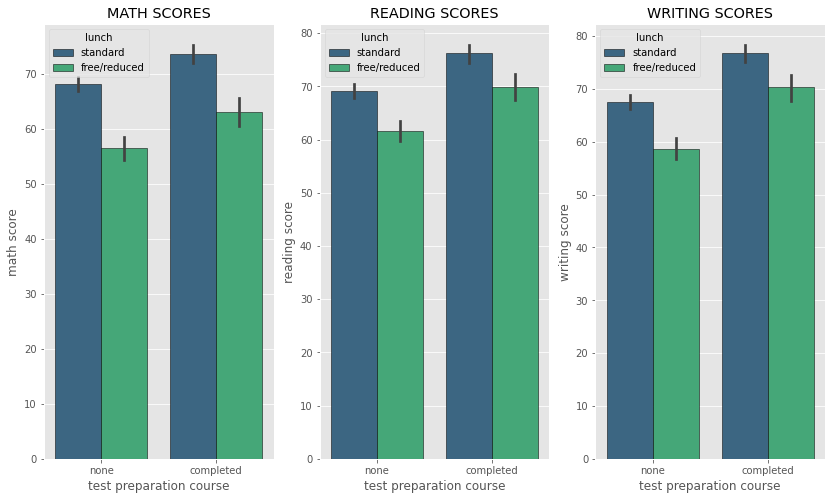

In [59]:
# checking how lunch affects the scores
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)

sns.barplot(x='test preparation course',y='math score',
            data=student_df, hue='lunch',palette='viridis',edgecolor='black')
plt.title('MATH SCORES')

plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',
            data=student_df, hue='lunch',palette='viridis',edgecolor='black')
plt.title('READING SCORES')

plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',
            data=student_df, hue='lunch',palette='viridis',edgecolor='black',)
plt.title('WRITING SCORES')

plt.show()

Students that were given the standard lunch always score higher in maths, reading and writing compared to students that received the free/reduced lunch.

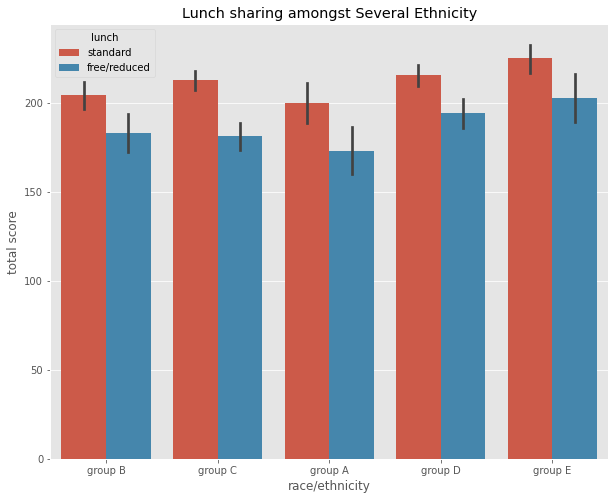

In [98]:
# visualizing the lunch sharing across several ethnicity
plt.figure(figsize=(10,8))
plt.title('Lunch sharing amongst Several Ethnicity')
sns.barplot(x='race/ethnicity', data=student_df, hue='lunch', y='total score')
plt.show()

#### Observations:

- across all race, the students getting the standard lunch averagely perform better than the students with free/ reduced lunch.


- Students from the group E race seems to perform better compared to the other races.



- Group E have the highest number of students with a higher cummulative score.

### Question 9: Sort the dataset and get only rows where total score is above or equals 250 and the students belongs to Group E ethnicity.

In [21]:
# showing only rows where student's total score is above or equals 250 and group E ethnicity
student_df.loc[(student_df['total score'] >= 250) & 
               (student_df['race/ethnicity'] == 'group E')
              ]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
34,male,group E,some college,standard,none,97,87,82,266
56,female,group E,associate's degree,standard,completed,82,85,86,253
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293
164,female,group E,master's degree,standard,none,81,92,91,264
171,male,group E,some high school,standard,none,94,88,78,260
214,male,group E,high school,standard,completed,87,91,81,259
216,female,group E,associate's degree,free/reduced,completed,83,86,88,257
233,male,group E,some high school,standard,none,92,87,78,257
263,female,group E,high school,standard,none,99,93,90,282


### Question 10: Filter out the students that got a total score less than the average total score which is 68.

In [16]:
student_df.loc[student_df['total score'] <= 68]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
59,female,group C,some high school,free/reduced,none,0,17,10,27
980,female,group B,high school,free/reduced,none,8,24,23,55


### Question 11: What is the minimum and maximum math score across the several ethnicity?

In [17]:
min_max = student_df.groupby('race/ethnicity')['math score'].agg(["min", "max"])
min_max.columns = ["min Math Score", "Max Math Score"]
min_max

,min Math Score,Max Math Score
race/ethnicity,,
group A,28,100
group B,8,97
group C,0,98
group D,26,100
group E,30,100


### Question 12: Using a graph show the relationship between the student's type of lunch and their parental level of education.

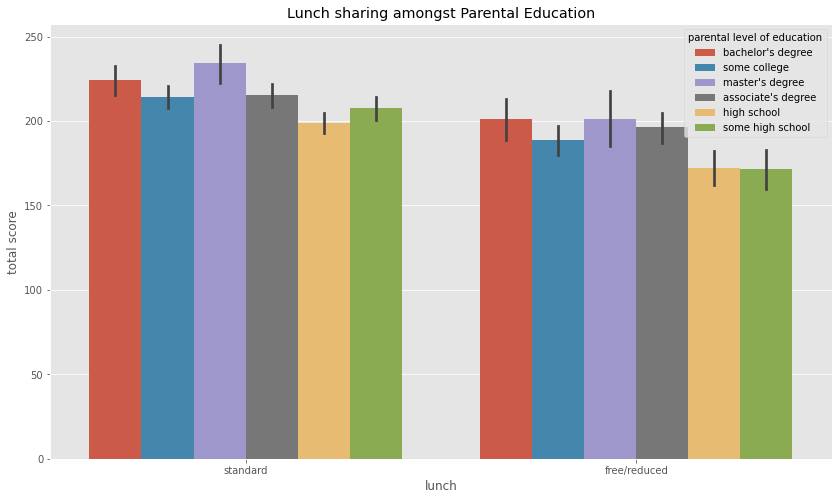

In [18]:
# visualizing the lunch sharing across parental level of education
plt.figure(figsize=(14, 8))
plt.title('Lunch sharing amongst Parental Education')
sns.barplot(x='lunch', data=student_df, hue='parental level of education', y='total score')
plt.show()

### Question 13: Show race/ethnicity based relationshp between the writing and reading score

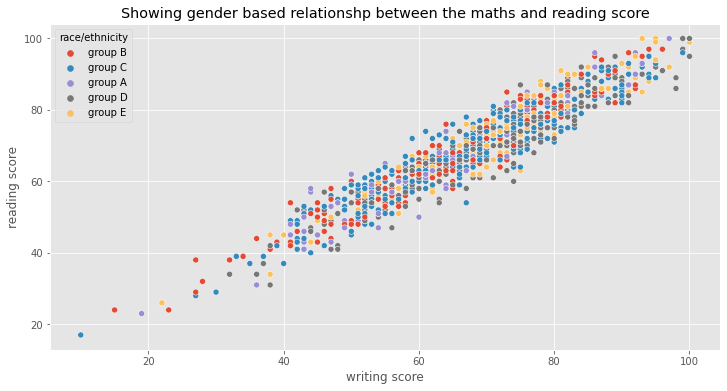

In [19]:
# Showing ethnicity based relationshp between the writing and reading score
plt.figure(figsize=(12, 6))
plt.title('Showing gender based relationshp between the maths and reading score')
sns.scatterplot(x='writing score', y='reading score', hue ='race/ethnicity', data=student_df);

### Question 14: Show the writing score distribution across the subjects based on the type of lunch received

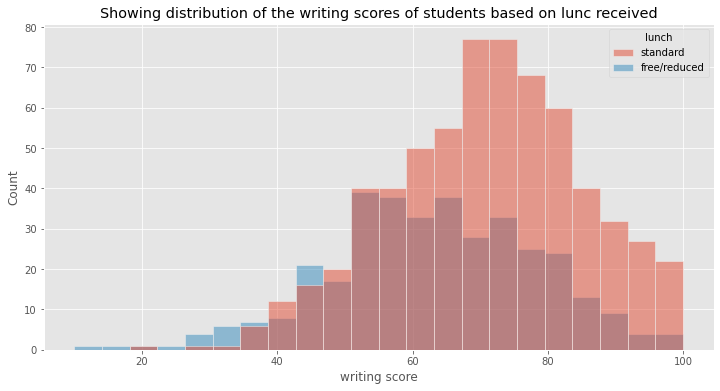

In [20]:
# distribution of writing score
plt.figure(figsize=(12, 6))
plt.title('Showing distribution of the writing scores of students based on lunc received')
sns.histplot(x='writing score', hue='lunch' ,data=student_df);

In [14]:
# showing only rows where student's total score is above or equals 250 and group E ethnicity
student_df.loc[(student_df['total score'] >= 250) & 
               (student_df['race/ethnicity'] == 'group E')
              ]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
34,male,group E,some college,standard,none,97,87,82,266
56,female,group E,associate's degree,standard,completed,82,85,86,253
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293
164,female,group E,master's degree,standard,none,81,92,91,264
171,male,group E,some high school,standard,none,94,88,78,260
214,male,group E,high school,standard,completed,87,91,81,259
216,female,group E,associate's degree,free/reduced,completed,83,86,88,257
233,male,group E,some high school,standard,none,92,87,78,257
263,female,group E,high school,standard,none,99,93,90,282


In [132]:
student_df.loc[student_df['total score'] <= 68]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
59,female,group C,some high school,free/reduced,none,0,17,10,27
980,female,group B,high school,free/reduced,none,8,24,23,55


In [169]:
min_max = student_df.groupby('race/ethnicity')['math score'].agg(["min", "max"])
min_max.columns = ["Min Math Score", "Max Math Score"]
min_max

,Min Math Score,Max Math Score
race/ethnicity,,
group A,28,100
group B,8,97
group C,0,98
group D,26,100
group E,30,100


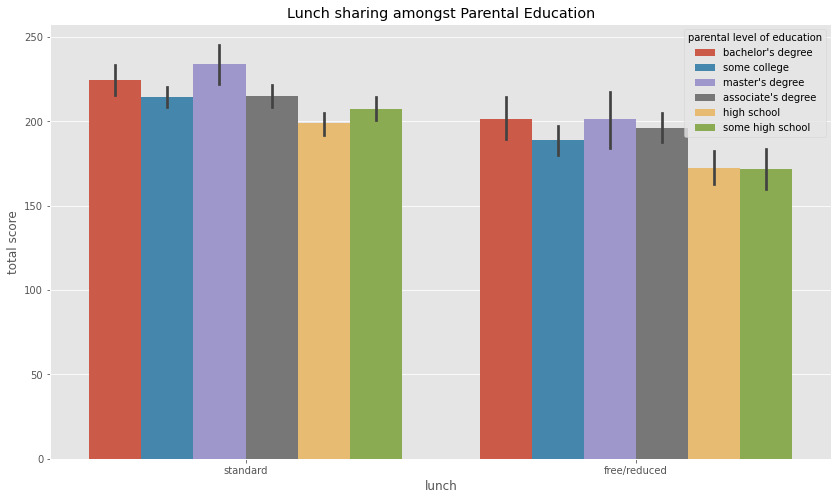

In [180]:
# visualizing the lunch sharing across several ethnicity
plt.figure(figsize=(14, 8))
plt.title('Lunch sharing amongst Parental Education')
sns.barplot(x='lunch', data=student_df, hue='parental level of education', y='total score')
plt.show()

- It is of assumption that parents with higher degree is likely to have good jobs therefore the chances of their children relying on free/reduced lunch is minimal and their total score is averagely above 200.



- The graph also show that parents with high school level of education have the highest level of parents whose children have low cumulative score.

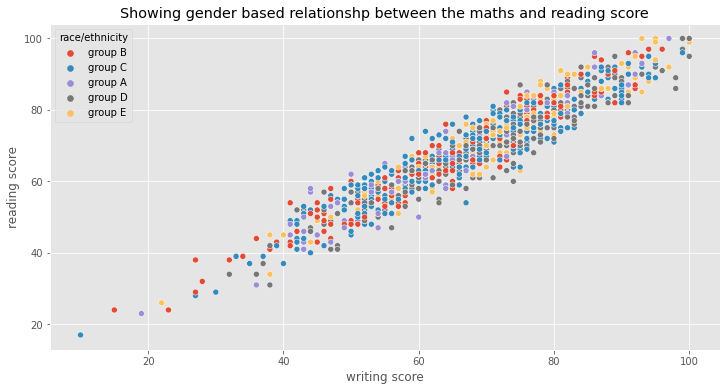

In [350]:
# Showing ethnicity based relationshp between the writing and reading score
plt.figure(figsize=(12, 6))
plt.title('Showing gender based relationshp between the maths and reading score')
sns.scatterplot(x='writing score', y='reading score', hue ='race/ethnicity', data=student_df);

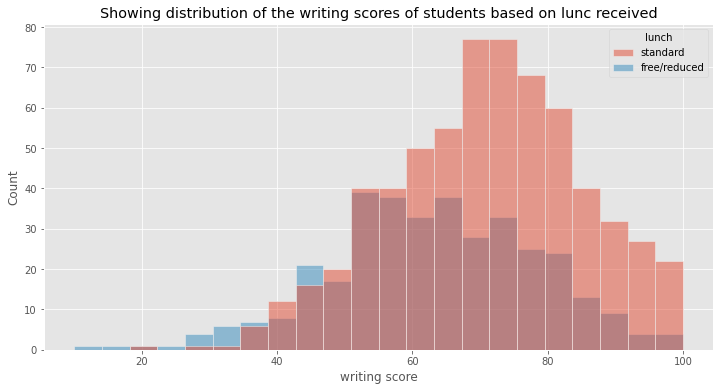

In [349]:
# distribution of writing score
plt.figure(figsize=(12, 6))
plt.title('Showing distribution of the writing scores of students based on lunc received')
sns.histplot(x='writing score', hue='lunch' ,data=student_df);

From the graph above, the students that receive standard lunch averagely score better than students that received free/reduced lunch.

In [273]:
# importing the required machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#### Training a machine learning model to predict the math score of students based on several variables

Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the feature and target column(s) for training the model.
2. Identify numeric and categorical input columns.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data into one-hot vectors.
6. Split the dataset into training and validation sets.


#### Identifing the Features and Targets

- The `Math Score` column contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the maths column and total score column) can be used as features to the model.

In [221]:
train_df = student_df.copy()

In [223]:
# spilitng our dataset into feature and target
X = train_df.drop(['math score', 'total score'], axis=1) #feature
y = train_df['math score'] #target

In [224]:
# filtering the numeric and categorical variables 
cat_col = X.select_dtypes(include = ['object']).columns.tolist()
num_col = X.select_dtypes(include = ['int64']).columns.tolist()

In [227]:
# converting the categorical variables to 0s and 1s so the machine can understand
X_cat = pd.get_dummies(X[cat_col])
X_cat.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [256]:
# filtering out only the numerical colum from the dataset
X_num = X[num_col]
X_num.head()

,reading score,writing score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75


### Scaling Numerical Values

The numeric columns in our dataset have varying ranges and a good practice is to [scale numeric features](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) to a small range of values e.g. $(0,1)$. 

Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.


In [257]:
# Create the scaler instance
scaler = MinMaxScaler()

In [258]:
# Fit the scaler to the numeric columns
model = scaler.fit(X_num)

In [259]:
# Transform and replace the numeric columns
X_scaled = model.transform(X_num)
display(X_scaled)
type(X_scaled)

array([[0.6626506 , 0.71111111],
       [0.87951807, 0.86666667],
       [0.93975904, 0.92222222],
       ...,
       [0.65060241, 0.61111111],
       [0.73493976, 0.74444444],
       [0.8313253 , 0.84444444]])

numpy.ndarray

In [ ]:
num_df = pd.DataFrame(X_scaled, columns=['reading score', 'writing score'])
num_df.head()

In [264]:
# joining the numerical and categorical dataframe to a new dataframe for machine learning
X_new = pd.concat([X_cat, num_df], axis=1)
X_new.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,reading score,writing score
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0.662651,0.711111
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0.879518,0.866667
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0.939759,0.922222
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0.481928,0.377778
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0.734940,0.722222


In [265]:
# spliting the test and train data into a 75% train size and 25% test size
X_train, y_train, X_test, y_test = train_test_split(X_new, y, test_size=0.25, random_state=42)

In [268]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((750, 19), (250, 19), (750,), (250,))

#### Training a Linear Regression Model

We're now ready to train the model. 

Linear regression is a commonly used technique for solving regression problems. 

In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. 

The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).

In [319]:
model = LinearRegression()

In [320]:
model.fit(X_train, X_test)

LinearRegression()

#### Making predictions and evaluate the model

The model is now trained, and we can use it to generate predictions for the training and test inputs. 
We can also evaluate the model's performance using the RMSE (root mean squared error) loss function.

In [321]:
X_preds = model.predict(X_train)

In [322]:
# Calculation of Mean Squared Error (MSE)
train_rmse = mean_squared_error(X_test, X_preds, squared=False)
print('The RMSE loss for the training set is {}.'.format(train_rmse))

The RMSE loss for the training set is 5.3001273584958355.


In [323]:
y_preds = model.predict(y_train)

In [324]:
# Calculation of Mean Squared Error (MSE)
test_rmse = mean_squared_error(y_test,y_preds, squared=False)
print('The RMSE loss for the testing set is {}.'.format(test_rmse))

The RMSE loss for the testing set is 5.483998740654487.


#### Feature Importance

Looking at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

In [325]:
weights = model.coef_
weights

array([-6.19843308e+13, -6.19843308e+13,  1.88225516e+13,  1.88225516e+13,
        1.88225516e+13,  1.88225516e+13,  1.88225516e+13, -3.08979666e+12,
       -3.08979666e+12, -3.08979666e+12, -3.08979666e+12, -3.08979666e+12,
       -3.08979666e+12, -1.66010021e+12, -1.66010021e+12, -2.82908410e+12,
       -2.82908410e+12,  1.88261719e+01,  6.61757812e+01])

In [326]:
# creating a dataframe to view the weight assigned to each column.
weights_df = pd.DataFrame({
    'columns': X_train.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [327]:
weights_df.head(20)

,columns,weight
6,race/ethnicity_group E,1.882255e+13
2,race/ethnicity_group A,1.882255e+13
3,race/ethnicity_group B,1.882255e+13
4,race/ethnicity_group C,1.882255e+13
5,race/ethnicity_group D,1.882255e+13
18,writing score,6.617578e+01
17,reading score,1.882617e+01
14,lunch_standard,-1.660100e+12
13,lunch_free/reduced,-1.660100e+12
16,test preparation course_none,-2.829084e+12


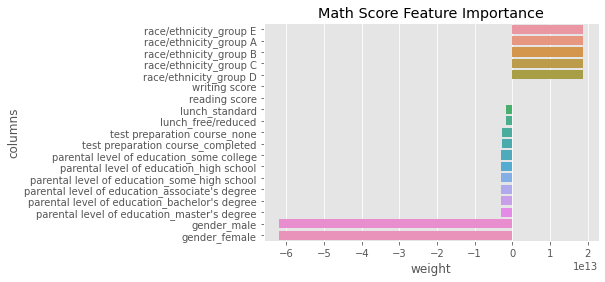

In [328]:
plt.title('Math Score Feature Importance')
sns.barplot(y=weights_df.head(20)['columns'], x=weights_df.head(20)['weight']);